In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
import torch

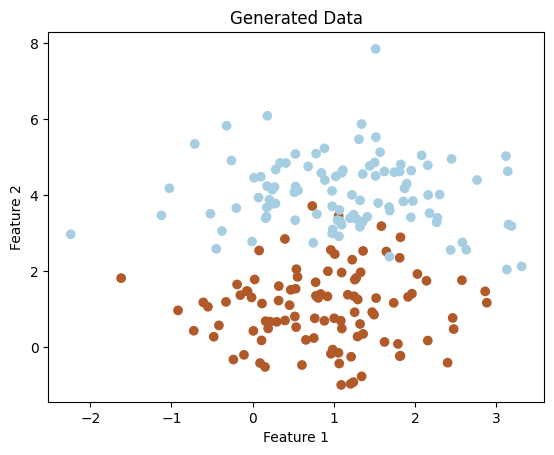

In [167]:
np.random.seed(42)
class_1 = np.random.normal(loc=[1, 1], scale=1, size=(100, 2))
class_2 = np.random.normal(loc=[1, 4], scale=1, size=(100, 2))

X = np.vstack([class_1, class_2])
y = np.hstack([np.ones(100), np.zeros(100)])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [168]:
X = np.c_[np.ones(X.shape[0]), X]

The logistic loss for a single training example is defined as:

$$ \text{LogisticLoss}(h_\theta(x), y) = -y \log(h_\theta(x)) - (1 - y) \log(1 - h_\theta(x)) $$

The overall logistic regression cost function is given by:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \text{LogisticLoss}(h_\theta(x^{(i)}), y^{(i)}) $$

In [170]:
# X

In [150]:
def logistic_loss(y, h):
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)  # Clip values to prevent log(0) or log(1)
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

In [151]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [157]:
n_epochs = 10000

m = len(y)
alpha = 0.001
theta = np.ones(X.shape[1])
costs = []

for epoch in range(n_epochs):
    
    y_hat = np.dot(X, theta)
    y_hat = sigmoid(y_hat)
    y_hat = (y_hat >= 0.5).astype(int)

    grad = np.dot(X.T, (y_hat - y)) / len(y)

    theta = theta - alpha * grad
    
    cost = logistic_loss(y, y_hat)
    costs.append(cost)

In [158]:
print("Weights:", theta)
print("Cost   :", cost)

Weights: [ 0.70058    -0.02537896 -0.2490601 ]
Cost   : 1.8996566896429943


In [159]:
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [160]:
y - y_hat

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [161]:
accuracy_score(y, y_hat)

0.945

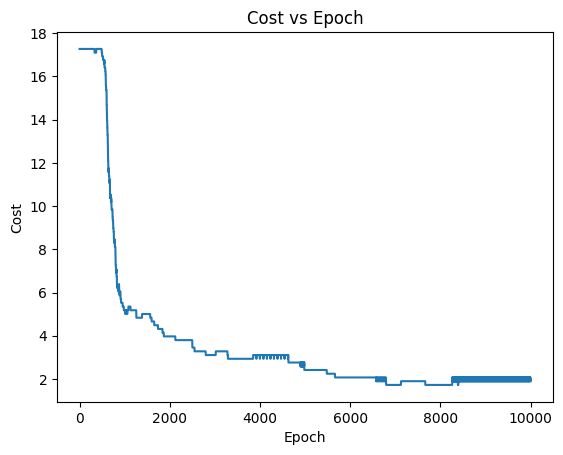

In [171]:
plt.plot(costs)
plt.title('Cost vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()